In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import os
import h5py
import seaborn as sns
from scipy import stats
from scipy.sparse import rand
from scipy.stats import binom
import networkx as nx
import saving as sv
from os.path import join as pjoin
sys.path.insert(0, '/Users/giovanni/Documents/GitHub/fufo')
#from MultipanelFigures import plotutils as pu
#import analysis, simulation 
sys.path.insert(0, '/Users/giovanni/Documents/GitHub/fufo/notebooks')
import utils_avalanches as av
#from functions import Allen_Atlas_148b as AA

#pathfig='/Users/giovanni/Documents/GitHub/fufo/data/Interim/Matteo/figures/'
#pathdata='/Users/giovanni/Documents/GitHub/fufo/data/Interim/Matteo/data/'
path='C:/Users/matte/OneDrive/Documenti/matteo/'

%matplotlib inline

In [31]:
sound_list=['rest','music','speech']
arr_mu = os.listdir(path +'seeg_fif_data/music')
arr_rest = os.listdir(path +'seeg_fif_data/speech')
arr_speech = os.listdir(path +'seeg_fif_data/rest')

subject_set_mu=set()
subject_set_speech=set()
subject_set_rest=set()

for st in arr_mu: 
    #print(st)
    subject_set_mu.add(st.partition('_')[0])
    #print(st.partition('_')[0])
    
for st in arr_speech:
    subject_set_speech.add(st.partition('_')[0])
    
for st in arr_rest:
    subject_set_rest.add(st.partition('_')[0])

subject_list=list(subject_set_mu.intersection(subject_set_speech,subject_set_rest))

#Here I create a set of the  all channels
total_channels_set=set()

for subject in subject_list:
    with h5py.File(pjoin(path +'seeg_data_h5py/h5_electrodes/', subject + '_electrodes.hdf5'), 'r') as f:
        #print(f.keys())
        #print('chnames', f['chnames'].shape)
        
        chnames = f['chnames'][...].astype('U')
        total_channels_set.update(chnames)
        
#print(total_channels_set)


#Here I create a set of the H channels
ch_H=set()
for ch in total_channels_set:
    
    if "H" in ch:
        ch_H.add(ch)

#Here I create another set of channels        
ch_IM=set()
for ch in total_channels_set:
    
    if "IP" in ch:
        ch_IM.add(ch)
#print(ch_H)



In [33]:
len(subject_list)

19

In [14]:
arr_mu = os.listdir(path+'seeg_fif_data/music')
sound_list=['speech', 'music','rest']
subject_list=[]
for st in arr_mu: 
    subject_list.append(st.partition('_')[0])
    print(st.partition('_')[0])
 
subject_list=[s for s in subject_list if 's' in s]
print()

print(subject_list)

sub-14c725b6b803
sub-26176ef8a8d0
sub-28e70e7c7fbb
sub-3ef8645f99c5
sub-4247d6d6cdbf
sub-44375d501493
sub-45a6830d263e
sub-82e330f8aadd
sub-83ebd5328120
sub-95a634be7e05
sub-9d783b836f5e
sub-a4e7fc9daa96
sub-aea837fa1826
sub-c1b7ce54ce05
sub-c2a96116ddc4
sub-cacae171ee15
sub-d9c48230fb78
sub-e0bb6ccef2a5
sub-ebf231d97f73
sub-fccb4adbfadc

['sub-14c725b6b803', 'sub-26176ef8a8d0', 'sub-28e70e7c7fbb', 'sub-3ef8645f99c5', 'sub-4247d6d6cdbf', 'sub-44375d501493', 'sub-45a6830d263e', 'sub-82e330f8aadd', 'sub-83ebd5328120', 'sub-95a634be7e05', 'sub-9d783b836f5e', 'sub-a4e7fc9daa96', 'sub-aea837fa1826', 'sub-c1b7ce54ce05', 'sub-c2a96116ddc4', 'sub-cacae171ee15', 'sub-d9c48230fb78', 'sub-e0bb6ccef2a5', 'sub-ebf231d97f73', 'sub-fccb4adbfadc']


In [367]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

In [37]:
col_s='#8CCC94'
col_m='#FCAC74'
col_r='#6CA4CC'

In [369]:
sound_list=['speech','music','rest']

In [370]:
subject_list=['sub-28e70e7c7fbb','sub-e0bb6ccef2a5','sub-aea837fa1826','sub-26176ef8a8d0','sub-cacae171ee15','sub-83ebd5328120',
 'sub-44375d501493','sub-c2a96116ddc4','sub-45a6830d263e','sub-ebf231d97f73','sub-a4e7fc9daa96', 'sub-fccb4adbfadc',
 'sub-14c725b6b803', 'sub-82e330f8aadd', 'sub-c1b7ce54ce05', 'sub-4247d6d6cdbf', 'sub-95a634be7e05', 'sub-3ef8645f99c5', 'sub-9d783b836f5e']

In [413]:
nsubs=len(subject_list)

In [371]:
tp={}
te={}

for subject in subject_list:
    tp[subject]={}
    te[subject]={}
    for sound in sound_list:
        T=sv.loading(pathdata+'temporal_scale_window350/temporal_scale_matrix_integral_window350'+sound+'_'+subject)
        ZT=stats.zscore(T, axis=1)
        ZTr=stats.zscore(T, axis=0)
        tp[subject][sound]=np.sqrt(np.sum((ZT)**2, axis=0))
        te[subject][sound]=stats.zscore(np.sum(ZTr, axis=1))

In [373]:
rss={} #here the activity profile of each subject is stored

for subject in subject_list:
    rss[subject]={}
    avalanches={}
    zdata=sv.loading(pathdata+'data_hgamma/data_hgenv_down100'+'_'+subject)

    #the threshold is derived as the 99th percentile of the data
    thres=np.percentile(zdata['rest'], 99)
    #print(thres)

    for sound in sound_list:
        #avalanches dictionaries are computed using the functions of Utils_avalanches.py
        avalanches[sound]=av.go_avalanches(zdata[sound].T, thre=thres, direc=0, binsize=2)
        rss[subject][sound]=np.sum(avalanches[sound]['Zbin'].T, axis=0)

2.8031487655477725
2.78534246404477
2.974497812545425
2.79738475441734
2.734310175019014
2.8089245753814596
2.897258743666651
2.798591903739693
2.8138171563785437
2.7508618986491324
2.7742837529435107
2.8552720483703933
2.750726412203649
3.334984151824247
2.7742848189222054
2.776143771977896
2.7331326834817284
2.818625307029934
2.7654285000333187


In [374]:
#ap={}
ae={}
for subject in subject_list:
    #ap[subject]={}
    ae[subject]={}
    zdata=sv.loading(pathdata+'data_hgamma/data_hgenv_down100'+'_'+subject)
    thres=np.percentile(zdata['rest'], 99)
    for sound in sound_list:
        avalanches=av.go_avalanches(zdata[sound].T, thre=thres, direc=0, binsize=2)
        ae[subject][sound]=np.sum(avalanches['Zbin'].T, axis=1)

In [375]:
L = 350 # window length for fitting
sp = 350 # window spacing
ap={}
for subject in subject_list:
    ap[subject]={}
    for sound in sound_list:

        tlen=len(rss[subject][sound])
        W_L = np.arange(0,tlen-int(L/2),int(sp/2)) # start times of windows, spaced every sp time points
        n_W = W_L.size # number of windows
        magt=np.zeros(n_W) 
        for i in range(n_W):
            t_start = W_L[i]
            t_stop = t_start + L
            dat=rss[subject][sound][t_start:t_stop]
            magt[i]=np.sum(dat)


        ap[subject][sound]=magt

In [376]:
isu=subject_list[0]
iso=sound_list[0]

In [377]:
tp[isu][iso].shape

(164,)

In [378]:
ap[isu][iso].shape

(164,)

# FIGURE 1

### Fig1.b Timescales 

In [183]:
T=sv.loading(pathdata+'temporal_scale_window350/temporal_scale_matrix_integral_window350'+iso+'_'+isu)
TP=tp[isu][iso]
TE=te[isu][iso]

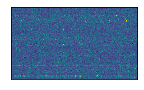

In [17]:
plt.figure(figsize=(2.1,1.35))
plt.imshow(T[:,:],cmap='viridis',interpolation='nearest',aspect='auto')
#cbar=plt.colorbar(ticks=[])
#for i in range(60):
#    plt.axvline(i-0.5,linewidth=0.1,color='lightsteelblue')
#plt.ylabel('Edges',fontsize=SMALL_SIZE)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(pathfig+'Fig1/Timescales.pdf', transparent=True, format="PDF")
plt.show()

In [201]:
plt.figure(figsize=(.5,.9))
plt.imshow(np.expand_dims(np.arange(100),1)[::-1,:],cmap='viridis',aspect='auto')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(pathfig+'Fig1/Cbar.pdf', transparent=True, format="PDF")
plt.show()

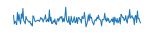

In [18]:
fig, ax = plt.subplots(figsize=(2.24,0.6))
ax.plot(TP[:],linewidth=1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticks([-75,-50,-25,0,25],['','','','',''])
plt.tight_layout()
plt.savefig(pathfig+'Fig1/TP.pdf', transparent=True, format="PDF")
plt.show()

In [19]:
plt.figure(figsize=(0.15,1.35))
plt.imshow(np.expand_dims(TE,0).T,cmap='viridis',interpolation='nearest',aspect='auto')
#plt.ylabel('Pearson`s  $r$',fontsize=SMALL_SIZE)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(pathfig+'Fig1/TE.pdf', transparent=True, format="PDF")
plt.show()

/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


### Fig1.b Binarized data

In [23]:
zdata=sv.loading(pathdata+'data_hgamma/data_env_high_gamma'+'_'+isu)
thres=np.percentile(zdata['rest'], 99)
avalanches=av.go_avalanches(zdata[iso].T, thre=thres, direc=0, binsize=6)
B=avalanches['Zbin'].T
RSS=rss[isu][iso]
AP=ap[isu][iso]
AE=ae[isu][iso]

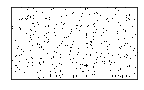

In [24]:
plt.figure(figsize=(2.1,1.35))
plt.imshow(B[:,:],interpolation='nearest',aspect='auto',cmap='bone_r')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(pathfig+'Fig1/ZBin.pdf', transparent=True, format="PDF")
plt.show()

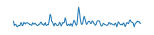

In [25]:
fig, ax = plt.subplots(figsize=(2.24,0.6))
ax.plot(AP[-int(350*30):],linewidth=1)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticks([-75,-50,-25,0,25],['','','','',''])
plt.tight_layout()
plt.savefig(pathfig+'Fig1/AP.pdf', transparent=True, format="PDF")
plt.show()

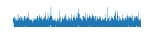

In [29]:
fig, ax = plt.subplots(figsize=(2.24,0.6))
ax.plot(RSS[::6],linewidth=0.2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticks([-75,-50,-25,0,25],['','','','',''])
plt.tight_layout()
plt.savefig(pathfig+'Fig1/RSS.pdf', transparent=True, format="PDF")
plt.show()

In [30]:
plt.figure(figsize=(0.15,1.35))
plt.imshow(np.expand_dims(AE,0).T,cmap='viridis',interpolation='nearest',aspect='auto')
#plt.ylabel('Pearson`s  $r$',fontsize=SMALL_SIZE)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(pathfig+'Fig1/AE.pdf', transparent=True, format="PDF")
plt.show()

/Users/giovanni/anaconda2/envs/p36workshop/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  


### Fig1.c Correlations

In [407]:
corr={}

corr['p']={}
corr['e']={}
for sound in sound_list:

    cor_p=[]
    cor_e=[]

    for subject in subject_list:

        ap_i=ap[subject][sound]
        tp_i=tp[subject][sound]
        ae_i=ae[subject][sound]
        te_i=te[subject][sound]
        m=min(len(ap_i),len(tp_i))

        cor_p.append(np.corrcoef(ap_i[:m], tp_i[:m])[0,1])
        cor_e.append(np.corrcoef(ae_i,te_i)[0,1])
#         cor_p.append(stats.spearmanr(ap_i[:m], tp_i[:m])[0])
#         cor_e.append(stats.spearmanr(ae_i,te_i)[0])

    corr['p'][sound]=np.array(cor_p)
    corr['e'][sound]=np.array(cor_e)

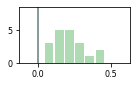

In [408]:
plt.figure(figsize=(2,1.3))
xmin=-0.1
xmax=0.6
n, bins, patches = plt.hist(x=corr['p']['speech'], bins=10, color=col_s,
                            alpha=0.7, rwidth=0.85, range=[xmin,xmax])
plt.axvline(0, alpha=0.75,c='darkslategray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(ymax=8.5)
plt.tight_layout()
plt.savefig(pathfig+'Fig1/Corr_p_s.pdf', transparent=True, format="PDF")
plt.show()

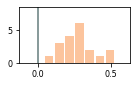

In [409]:
plt.figure(figsize=(2,1.3))
n, bins, patches = plt.hist(x=corr['p']['music'], bins=10, color=col_m,
                            alpha=0.7, rwidth=0.85, range=[xmin,xmax])
plt.axvline(0, alpha=0.75,c='darkslategray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(ymax=8.5)
plt.tight_layout()
plt.savefig(pathfig+'Fig1/Corr_p_m.pdf', transparent=True, format="PDF")
plt.show()

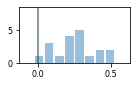

In [410]:
plt.figure(figsize=(2,1.3))
n, bins, patches = plt.hist(x=corr['p']['rest'], bins=10, color=col_r,
                            alpha=0.7, rwidth=0.85, range=[xmin,xmax])
plt.axvline(0, alpha=0.75,c='darkslategray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(ymax=8.5)
plt.tight_layout()
plt.savefig(pathfig+'Fig1/Corr_p_r.pdf', transparent=True, format="PDF")
plt.show()

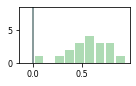

In [383]:
plt.figure(figsize=(2,1.3))
xmin=-0.1
xmax=.95
n, bins, patches = plt.hist(x=corr['e']['speech'], bins=10, color=col_s,
                            alpha=0.7, rwidth=0.85, range=[xmin,xmax])
plt.axvline(0, alpha=0.75,c='darkslategray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(ymax=8.5)
plt.tight_layout()
plt.savefig(pathfig+'Fig1/Corr_e_s.pdf', transparent=True, format="PDF")
plt.show()

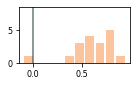

In [384]:
plt.figure(figsize=(2,1.3))
n, bins, patches = plt.hist(x=corr['e']['music'], bins=10, color=col_m,
                            alpha=0.7, rwidth=0.85, range=[xmin,xmax])
plt.axvline(0, alpha=0.75,c='darkslategray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(ymax=8.5)
plt.tight_layout()
plt.savefig(pathfig+'Fig1/Corr_e_m.pdf', transparent=True, format="PDF")
plt.show()

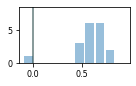

In [385]:
plt.figure(figsize=(2,1.3))
n, bins, patches = plt.hist(x=corr['e']['rest'], bins=10, color=col_r,
                            alpha=0.7, rwidth=0.85, range=[xmin,xmax])
plt.axvline(0, alpha=0.75,c='darkslategray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylim(ymax=8.5)
plt.tight_layout()
plt.savefig(pathfig+'Fig1/Corr_e_r.pdf', transparent=True, format="PDF")
plt.show()

In [386]:
rss[i][sound_list[2]].shape

KeyError: 160

# FIGURE 2

In [393]:
RSS={'speech':np.zeros((len(subject_list),28735)),'music':np.zeros((len(subject_list),28918)),'rest':np.zeros((len(subject_list),28335))}

In [394]:
for ii, i in enumerate(subject_list):
    for ij, j in enumerate(sound_list):
        RSS[j][ii,:]=rss[i][j]

In [35]:
cl='viridis'
vm=0.15

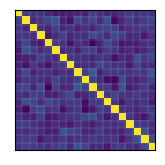

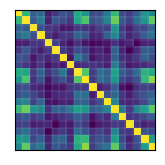

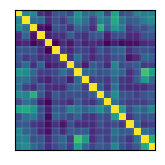

In [69]:
dataused='only_H'
corr_matrix=sv.loading( 'matrix_corr_'+dataused)

for sound in sound_list:
    plt.figure(figsize=(1.75,1.75))
    #plt.title('Backbone',fontsize=MEDIUM_SIZE)
    plt.imshow(corr_matrix[sound],cmap=cl,interpolation='nearest',vmax=vm)
    for i in range(len(subject_list)):
        plt.axvline(i-0.5,linewidth=0.15,color='lightsteelblue')
        plt.axhline(i-0.5,linewidth=0.15,color='lightsteelblue')
    #plt.ylabel('channels',fontsize=SMALL_SIZE)
    #plt.xlabel('channels',fontsize=SMALL_SIZE)
    plt.yticks([])
    plt.xticks([])
    plt.tight_layout()
    plt.savefig('Figura_S1/Corr_sub_'+dataused+sound+'.pdf', transparent=True, format="PDF")
    plt.show()

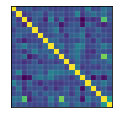

In [397]:
plt.figure(figsize=(1.75,1.75))
#plt.title('Backbone',fontsize=MEDIUM_SIZE)
plt.imshow(np.corrcoef(RSS['music']),cmap=cl,interpolation='nearest',vmax=vm)
for i in range(len(subject_list)):
    plt.axvline(i-0.5,linewidth=0.15,color='lightsteelblue')
    plt.axhline(i-0.5,linewidth=0.15,color='lightsteelblue')
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig(pathfig+'Fig2/Corr_sub_m.pdf', transparent=True, format="PDF")
plt.show()

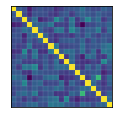

In [398]:
plt.figure(figsize=(1.75,1.75))
plt.imshow(np.corrcoef(RSS['rest']),cmap=cl,interpolation='nearest',vmax=vm)
for i in range(len(subject_list)):
    plt.axvline(i-0.5,linewidth=0.15,color='lightsteelblue')
    plt.axhline(i-0.5,linewidth=0.15,color='lightsteelblue')
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig(pathfig+'Fig2/Corr_sub_r.pdf', transparent=True, format="PDF")
plt.show()

In [55]:
randoms=sv.loading(path+'list_random_correlation_dict_'+dataused)


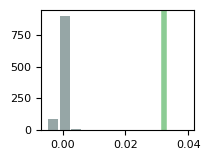

In [70]:
dataused='only_H'
plt.figure(figsize=(2.2,1.7))
xmin=-0.005
xmax=.04
n, bins, patches = plt.hist(x=randoms['speech'], bins=12, color='darkslategray',
                            alpha=0.5, rwidth=0.85, range=[xmin,xmax])
plt.axvline(np.mean(corr_matrix['speech'][np.triu_indices(len(subject_list),1)]),c=col_s,linewidth=4)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.ylim(ymax=8.5)
plt.tight_layout()
plt.savefig('figura_S1/Histcorr_sub_s'+dataused+'.png', dpi=600)
plt.show()

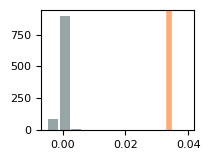

In [71]:
plt.figure(figsize=(2.2,1.7))
xmin=-0.005
xmax=.04
n, bins, patches = plt.hist(x=randoms['music'], bins=12, color='darkslategray',
                            alpha=0.5, rwidth=0.85, range=[xmin,xmax])
plt.axvline(np.mean(corr_matrix['music'][np.triu_indices(len(subject_list),1)]),c=col_m,linewidth=4)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.ylim(ymax=8.5)
plt.tight_layout()
plt.savefig('figura_S1/Histcorr_sub_m'+dataused+'.png', dpi=600)
plt.show()

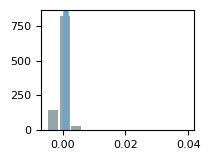

In [72]:
plt.figure(figsize=(2.2,1.7))
xmin=-0.005
xmax=.04
n, bins, patches = plt.hist(x=randoms['rest'], bins=12, color='darkslategray',
                            alpha=0.5, rwidth=0.85, range=[xmin,xmax])
plt.axvline(np.mean(corr_matrix['rest'][np.triu_indices(len(subject_list),1)]),c=col_r,linewidth=4)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
#plt.ylim(ymax=8.5)
plt.tight_layout()
plt.savefig('figura_S1/Histcorr_sub_r'+dataused+'.png', dpi=600)
plt.show()

NameError: name 'RSS' is not defined

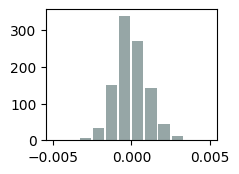

In [68]:
plt.figure(figsize=(2.2,1.7))
n, bins, patches = plt.hist(x=randoms['music'], bins=12, color='darkslategray',
                            alpha=0.5, rwidth=0.85, range=[xmin,xmax])
plt.axvline(np.mean(np.corrcoef(RSS['music'])[np.triu_indices(len(subject_list),1)]),c=col_m,linewidth=4)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig(pathfig+'Fig2/Histcorr_sub_m.png', transparent=True, format="PDF")
plt.show()

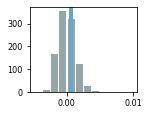

In [402]:
plt.figure(figsize=(2.2,1.7))
n, bins, patches = plt.hist(x=randoms['rest'], bins=12, color='darkslategray',
                            alpha=0.5, rwidth=0.85, range=[xmin,xmax])
plt.axvline(np.mean(np.corrcoef(RSS['rest'])[np.triu_indices(len(subject_list),1)]),c=col_r,linewidth=4)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.savefig(pathfig+'Fig2/Histcorr_sub_r.pdf', transparent=True, format="PDF")
plt.show()

In [412]:
RSS['speech'].shape

(19, 28735)

### Dynamical correlation

In [778]:
L = 500 # window length for fitting
sp = 50 # window spacing
dc={}
for sound in sound_list:
    tlen=len(RSS[sound][0])
    W_L = np.arange(0,tlen-int(L),int(sp)) # start times of windows, spaced every sp time points
    n_W = W_L.size # number of windows
    nedges=int(nsubs*(nsubs-1)/2)
    magt=np.zeros((n_W,nedges)) 
    for i in range(n_W):
        t_start = W_L[i]
        t_stop = t_start + L
        dat=RSS[sound][:,t_start:t_stop]
        magt[i,:]=np.corrcoef(dat)[np.triu_indices(nsubs,1)]
    dc[sound]=magt

In [779]:
# L = 100 # window length for fitting
# sp = 50 # window spacing
# dc={}
# for sound in sound_list:
#     tlen=len(RSS[sound][0])
#     W_L = np.arange(0,tlen-int(L),int(sp)) # start times of windows, spaced every sp time points
#     n_W = W_L.size # number of windows
#     nedges=int(nsubs*(nsubs-1)/2)
#     magt=np.zeros((n_W,nedges)) 
#     for i in range(n_W):
#         t_start = W_L[i]
#         t_stop = t_start + L
#         dat=RSS[sound][:,t_start:t_stop]
#         sr=np.where(stats.spearmanr(dat.T)[1]<0.05,stats.spearmanr(dat.T)[0],0)
#         magt[i,:]=sr[np.triu_indices(nsubs,1)]
#     dc[sound]=magt

In [780]:
from matplotlib import cm


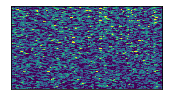

In [785]:
plt.figure(figsize=(2.45,1.5))
#plt.figure(figsize=(2.1,1.35))
ord_s=np.argsort(np.mean(dc['speech'],axis=0))[::-1]
plt.imshow(dc['speech'][:,ord_s].T,cmap='viridis',interpolation='nearest',aspect='auto',vmin=-0.05,vmax=0.2)
#plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(pathfig+'Fig2/DCmat_s.pdf', transparent=True, format="PDF")
plt.show()

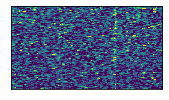

In [787]:
plt.figure(figsize=(2.45,1.5))
#plt.figure(figsize=(2.1,1.35))
ord_m=np.argsort(np.mean(dc['music'],axis=0))[::-1]
plt.imshow(dc['music'][:,ord_m].T,cmap='viridis',interpolation='nearest',aspect='auto',vmin=-0.05,vmax=0.2)
#plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(pathfig+'Fig2/DCmat_m.pdf', transparent=True, format="PDF")
plt.show()

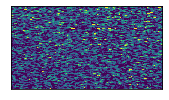

In [788]:
plt.figure(figsize=(2.45,1.5))
#plt.figure(figsize=(2.1,1.35))
ord_r=np.argsort(np.mean(dc['rest'],axis=0))[::-1]
plt.imshow(dc['rest'][:,ord_r].T,cmap='viridis',interpolation='nearest',aspect='auto',vmin=-0.05,vmax=0.2)#plt.xticks([])
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig(pathfig+'Fig2/DCmat_r.pdf', transparent=True, format="PDF")
plt.show()

In [763]:
dc_s=np.mean(dc['speech'],axis=1)[1:]
dc_m=np.mean(dc['music'],axis=1)[1:]
dc_r=np.mean(dc['rest'],axis=1)[1:]

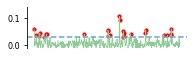

In [774]:
fig, ax = plt.subplots(figsize=(2.8,.9))
ax.plot(dc_s,c=col_s,linewidth=0.75)
ax.axhline(np.max(dc_r),linestyle='--',c=col_r)
ax.scatter(np.where(dc_s>np.max(dc_r))[0],dc_s[np.where(dc_s>np.max(dc_r))],c='r',s=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xticks([])
ax.tick_params(labelsize=8)
ax.set_ylim((-0.01,0.14))
#ax.set_yticks([-75,-50,-25,0,25],['','','','',''])
plt.tight_layout()
plt.savefig(pathfig+'Fig2/dc_s.pdf', transparent=True, format="PDF")
plt.show()

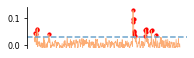

In [775]:
fig, ax = plt.subplots(figsize=(2.8,.9))
ax.plot(dc_m,c=col_m,linewidth=0.75)
ax.axhline(np.max(dc_r),linestyle='--',c=col_r)
ax.scatter(np.where(dc_m>np.max(dc_r))[0],dc_m[np.where(dc_m>np.max(dc_r))],c='r',s=10)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xticks([])
ax.set_ylim((-0.01,0.14))
ax.tick_params(labelsize=8)
#ax.set_yticks([-75,-50,-25,0,25],['','','','',''])
plt.tight_layout()
plt.savefig(pathfig+'Fig2/dc_m.pdf', transparent=True, format="PDF")
plt.show()

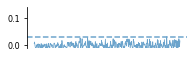

In [776]:
fig, ax = plt.subplots(figsize=(2.8,.9))
ax.plot(dc_r,c=col_r,linewidth=0.75)
ax.axhline(np.max(dc_r),linestyle='--',c=col_r)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.set_xticks([])
ax.tick_params(labelsize=8)
ax.set_ylim((-0.01,0.14))
plt.tight_layout()
plt.savefig(pathfig+'Fig2/dc_r.pdf', transparent=True, format="PDF")
plt.show()

In [676]:
dat.shape

(19, 500)

# SUPPL FIGURE 4

In [321]:
TPS={'speech':np.zeros((len(subject_list),164)),'music':np.zeros((len(subject_list),165)),'rest':np.zeros((len(subject_list),161))}

In [322]:
for ii, i in enumerate(subject_list):
    for ij, j in enumerate(sound_list):
        TPS[j][ii,:]=tp[i][j]

In [328]:
cl='viridis'
vm=0.3

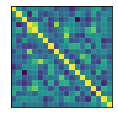

In [329]:
plt.figure(figsize=(1.75,1.75))
#plt.title('Backbone',fontsize=MEDIUM_SIZE)
plt.imshow(np.corrcoef(TPS['speech']),cmap=cl,interpolation='nearest',vmax=vm)
for i in range(len(subject_list)):
    plt.axvline(i-0.5,linewidth=0.15,color='lightsteelblue')
    plt.axhline(i-0.5,linewidth=0.15,color='lightsteelblue')
#plt.ylabel('channels',fontsize=SMALL_SIZE)
#plt.xlabel('channels',fontsize=SMALL_SIZE)
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig(pathfig+'FigS4/CorrTP_sub_s.pdf', transparent=True, format="PDF")
plt.show()

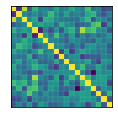

In [330]:
plt.figure(figsize=(1.75,1.75))
#plt.title('Backbone',fontsize=MEDIUM_SIZE)
plt.imshow(np.corrcoef(TPS['music']),cmap=cl,interpolation='nearest',vmax=vm)
for i in range(len(subject_list)):
    plt.axvline(i-0.5,linewidth=0.15,color='lightsteelblue')
    plt.axhline(i-0.5,linewidth=0.15,color='lightsteelblue')
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig(pathfig+'FigS4/CorrTP_sub_m.pdf', transparent=True, format="PDF")
plt.show()

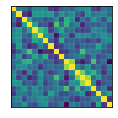

In [332]:
plt.figure(figsize=(1.75,1.75))
plt.imshow(np.corrcoef(TPS['rest']),cmap=cl,interpolation='nearest',vmax=vm)
for i in range(len(subject_list)):
    plt.axvline(i-0.5,linewidth=0.15,color='lightsteelblue')
    plt.axhline(i-0.5,linewidth=0.15,color='lightsteelblue')
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig(pathfig+'FigS4/CorrTP_sub_r.pdf', transparent=True, format="PDF")
plt.show()

In [99]:
isu=subject_list[6]
iso=sound_list[2]

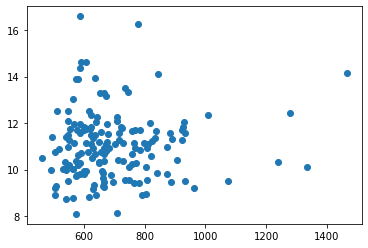

In [125]:
i=1
plt.figure()
isu=subject_list[7]
ap_i=ap[subject]['speech']
tp_i=tp[subject]['speech']
m=min(len(ap_i),len(tp_i))

plt.scatter(ap_i[:m],tp_i[:m])
plt.title('Corr=%.3f'%stats.spearmanr)


In [101]:
np.corrcoef(ap[isu]['rest'],tp[isu]['rest'])

array([[1.        , 0.08244979],
       [0.08244979, 1.        ]])

In [102]:
stats.spearmanr(ap[isu]['rest'],tp[isu]['rest'])

SpearmanrResult(correlation=0.12042938711266638, pvalue=0.12808053331225105)

In [104]:
for subject in subject_list:

    for sound in sound_list:
        if len(ap[subject][sound])!=len(tp[subject][sound]):
            print('ops')

ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops
ops


# BACKUP

In [ ]:
t_scale[subject]=dict()
    
    for sound in sound_list:
        
        tlen=zdata[sound].shape[1]
        nregions=zdata[sound].shape[0]
        W_L = np.arange(0,tlen-L,sp) # start times of windows, spaced every sp time points
        n_W = W_L.size # number of windows
        acft=np.zeros(n_W) 
        T=np.zeros((nregions, n_W))

        for i in range(n_W):
            t_start = W_L[i]
            t_stop = t_start + L
            dat=zdata[sound][:,t_start:t_stop]

            # Autocorrelation
            ACA=np.zeros((nregions,max_delay))
            for ir in range(nregions):
                ACA[ir,:]=acfun(dat[ir,:],max_delay)

            p0 = (1, 8) # start with values near those we expect
            #M=np.zeros(nregions)
            #B=np.zeros(nregions)
            

            for ir in range(nregions):
                first_min=max(np.argmax(np.sign(np.diff(ACA[ir])))+1,5)
                tshift=np.arange(0,first_min,1)
                
                T[ir,i]=np.sum(ACA[ir][:first_min])
                
            acft[i]=np.mean(T[:,i])
        
        t_scale[subject][sound]=acft

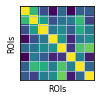

In [4]:
plt.figure(figsize=(1.5,1.5))
#plt.title('Backbone',fontsize=MEDIUM_SIZE)
plt.imshow(np.corrcoef(BOLD[720:800,:].T),cmap='viridis',interpolation='nearest')
for i in range(8):
    plt.axvline(i-0.5,linewidth=0.75,color='lightsteelblue')
    plt.axhline(i-0.5,linewidth=0.75,color='lightsteelblue')
plt.ylabel('ROIs',fontsize=SMALL_SIZE)
plt.xlabel('ROIs',fontsize=SMALL_SIZE)
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig(pathetienne+'FAA.pdf', transparent=True, format="PDF")
plt.show()

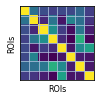

In [10]:
plt.figure(figsize=(1.5,1.5))
#plt.title('Backbone',fontsize=MEDIUM_SIZE)
plt.imshow(np.corrcoef(BOLD[20:500,:].T),cmap='viridis',interpolation='nearest')
for i in range(8):
    plt.axvline(i-0.5,linewidth=0.75,color='lightsteelblue')
    plt.axhline(i-0.5,linewidth=0.75,color='lightsteelblue')
plt.ylabel('ROIs',fontsize=SMALL_SIZE)
plt.xlabel('ROIs',fontsize=SMALL_SIZE)
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig(pathetienne+'FAAB.pdf', transparent=True, format="PDF")
plt.show()

In [15]:
Mat=np.zeros((8,8))
Mat[np.triu_indices(8,1)]=list4
Mat=Mat+Mat.T

In [16]:
# \begin{bmatrix}
#     0 & 1 & 1 & 1 & 2 & 0 & 0 & 0 \\
#     1 & 0 & 0 & 0 & 0 & 0 & 2 & 1 \\
#     1 & 0 & 0 & 1 & 1 & 0 & 0 & 1 \\
#     1 & 0 & 1 & 0 & 1 & 0 & 1 & 1 \\
#     2 & 0 & 1 & 1 & 0 & 0 & 0 & 0 \\
#     0 & 0 & 0 & 0 & 0 & 0 & 3 & 0 \\
#     0 & 2 & 0 & 1 & 0 & 3 & 0 & 0 \\
#     0 & 1 & 1 & 1 & 0 & 0 & 0 & 0
# \end{bmatrix}

array([[0., 1., 1., 1., 2., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 2., 1.],
       [1., 0., 0., 1., 1., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 1.],
       [2., 0., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0.],
       [0., 2., 0., 1., 0., 3., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0.]])

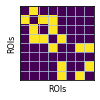

In [167]:
Mbin=np.array([[0., 1., 0, 0., 0, 0., 0., 0.],
               [1., 0., 1., 1., 0., 0., 0, 0],
               [0., 1., 0., 1., 0, 0., 0., 0.],
               [0, 1., 1., 0., 1., 0., 0., 0],
               [0, 0., 0., 1., 0., 0., 1., 1.],
               [0., 0., 0., 0, 0, 0., 0, 0.],
               [0., 0, 0., 0., 1., 0, 0., 1.],
               [0., 0, 0., 0., 1., 0., 1., 0.]])
plt.figure(figsize=(1.5,1.5))
#plt.title('Backbone',fontsize=MEDIUM_SIZE)
plt.imshow(Mbin.T,cmap='viridis',interpolation='nearest')
for i in range(8):
    plt.axvline(i-0.5,linewidth=0.75,color='lightsteelblue')
    plt.axhline(i-0.5,linewidth=0.75,color='lightsteelblue')
plt.ylabel('ROIs',fontsize=SMALL_SIZE)
plt.xlabel('ROIs',fontsize=SMALL_SIZE)
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig(pathetienne+'fig1a_bbone.pdf', transparent=True, format="PDF")
plt.show()

### BINOMIAL

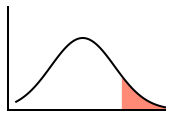

In [7]:
n, p = 6, 0.7
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
x = np.linspace(-4.,5,100)
density = stats.kde.gaussian_kde(binom.pmf(x, n, p),40)


f, ax = plt.subplots(figsize=(2.5, 1.75))
plt.plot(x, density(x),c='k',linewidth=2,label='original')
plt.fill_between(x[70:], density(x[70:]), facecolor='tomato', alpha=0.75)
ax.set_frame_on(False)
plt.axvline(-4.5,c='k',linewidth=2)
plt.axhline(0,c='k',linewidth=2)
plt.ylim(-0.003,0.3)
plt.xlim(-4.54,5)
plt.yticks([])
plt.xticks([])
#plt.legend();
plt.tight_layout()
#plt.savefig(pathetienne+'binomial.pdf', transparent=True, format="PDF")
plt.show()

# FIGURE CONCEPT 

In [44]:
bbone_exe=np.load(pathdata+'nice_indbb.npy')
bbone_average=np.load(pathdata+'average_bb.npy')

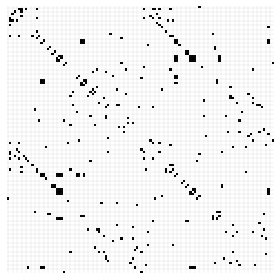

In [83]:
plt.figure(figsize=(4.,4.))
#plt.title('Backbone',fontsize=MEDIUM_SIZE)
plt.imshow(bbone_exe,cmap='bone_r',interpolation='nearest')
for i in range(119)[::2]:
    plt.axvline(i,linewidth=0.1,color='gray')
    plt.axhline(i,linewidth=0.1,color='gray')
#plt.ylabel('ROIs',fontsize=SMALL_SIZE)
#plt.xlabel('ROIs',fontsize=SMALL_SIZE)
plt.axis('off')
plt.yticks([])
plt.xticks([])
plt.tight_layout()
#plt.savefig(pathetienne+'fig2a_bb.pdf', transparent=True, format="PDF")
plt.show()

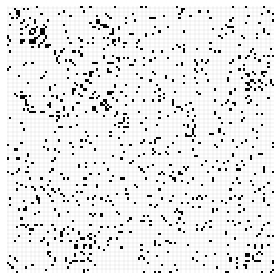

In [119]:
plt.figure(figsize=(4.,4.))
#plt.title('Backbone',fontsize=MEDIUM_SIZE)
plt.imshow(np.where(bbone_average-40*np.random.random((120,120))+30*np.random.random((120,120))>20.5,1,0)[np.ix_(norder,norder)],cmap='bone_r',interpolation='nearest')
for i in range(119)[::2]:
    plt.axvline(i,linewidth=0.1,color='gray')
    plt.axhline(i,linewidth=0.1,color='gray')
#plt.ylabel('ROIs',fontsize=SMALL_SIZE)
#plt.xlabel('ROIs',fontsize=SMALL_SIZE)
plt.axis('off')
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig(pathetienne+'figQRdis.pdf', transparent=True, format="PDF")
plt.show()

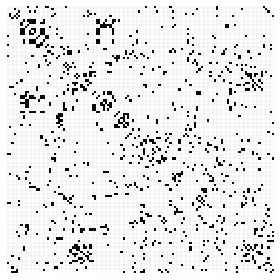

In [110]:
plt.figure(figsize=(4.,4.))
#plt.title('Backbone',fontsize=MEDIUM_SIZE)
plt.imshow(np.where(bbone_average-20*np.random.random((120,120))>1.,1,0)[np.ix_(norder,norder)],cmap='bone_r',interpolation='nearest')
for i in range(119)[::2]:
    plt.axvline(i,linewidth=0.1,color='gray')
    plt.axhline(i,linewidth=0.1,color='gray')
#plt.ylabel('ROIs',fontsize=SMALL_SIZE)
#plt.xlabel('ROIs',fontsize=SMALL_SIZE)
plt.axis('off')
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig(pathetienne+'figQRold.pdf', transparent=True, format="PDF")
plt.show()

In [108]:
norder=np.copy(order)
for i in np.arange(120,148):
    norder=np.delete(norder,np.where(norder==i))

In [109]:
norder

array([  9,  10,  11,  12,  13,  14,  15,  16,  18,  19,  22,  23,  24,
        25,  26,  83,  84,  85,  86,  87,  88,  89,  90,  92,  93,  96,
        97,  98,  99, 100,   1,   2,   3,   4,   5,   6,   7,   8,  20,
        21,  75,  76,  77,  78,  79,  80,  81,  82,  94,  95,  30,  31,
        32,  34,  35,  46,  47,  56,  57,  58, 104, 105, 106, 108, 109,
        44,  45,  48,  49,  50,  51,  52, 118, 119,  27,  41,  42,  43,
       101, 115, 116, 117,  28,  29,  33,  36,  37,  38,  39,  53,  54,
       102, 103, 107, 110, 111, 112, 113,   0,  17,  40,  55,  60,  74,
        91, 114,  59,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73])

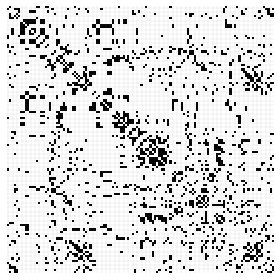

In [111]:
plt.figure(figsize=(4.,4.))
#plt.title('Backbone',fontsize=MEDIUM_SIZE)
plt.imshow(np.where(bbone_average>4.,1,0)[np.ix_(norder,norder)],cmap='bone_r',interpolation='nearest')
for i in range(119)[::2]:
    plt.axvline(i,linewidth=0.1,color='gray')
    plt.axhline(i,linewidth=0.1,color='gray')
#plt.ylabel('ROIs',fontsize=SMALL_SIZE)
#plt.xlabel('ROIs',fontsize=SMALL_SIZE)
plt.axis('off')
plt.yticks([])
plt.xticks([])
plt.tight_layout()
plt.savefig(pathetienne+'figQRyoung.pdf', transparent=True, format="PDF")
plt.show()